In [4]:
import pandas as pd
import os

In [16]:
os.listdir('data_p14')[1]

'p14_0.csv'

In [22]:
data_name = os.listdir('data_p14')[1]
data = pd.read_csv('data_p14/{}'.format(data_name), 
                   names =['p', 'K', 'm', 'decode_m', 'encode_m', 'kAG.x', 'kAG.y', 'kBG.x', 'kBG.y'])

In [32]:
data_name[-3:] == 'csv'

True

In [18]:
data.head()

,p,K,m,decode_m,encode_m,kAG.x,kAG.y,kBG.x,kBG.y
0,10343,20,0,0,265,1814,4258,6716,6607
1,10343,20,1,21,8703,1814,4258,6716,6607
2,10343,20,2,40,7199,1814,4258,6716,6607
3,10343,20,3,60,3581,1814,4258,6716,6607
4,10343,20,4,84,6948,1814,4258,6716,6607


In [40]:
Y = pd.DataFrame([data.m % 2]).transpose()
Y['m0'] = (Y.m + 1)%2
Y.head()

,m,m0
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [10]:
X = data[['encode_m', 'kAG.x', 'kAG.y', 'kBG.x', 'kBG.y']]
X.head()

,encode_m,kAG.x,kAG.y,kBG.x,kBG.y
0,265,1814,4258,6716,6607
1,8703,1814,4258,6716,6607
2,7199,1814,4258,6716,6607
3,3581,1814,4258,6716,6607
4,6948,1814,4258,6716,6607


In [57]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(56, input_dim=5))
model.add(Dropout(0.5))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.add(Dense(2))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 56)                336       
_________________________________________________________________
dropout_17 (Dropout)         (None, 56)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               7296      
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 258       
__________

In [68]:
acc  = []
loss = []

for i in range(100):
    print('{}%'.format(i/100), end='\r')
    for data_name in os.listdir('data_p14'):
        #get data
        if data_name[-3:] != 'csv' :
            continue
        data = pd.read_csv('data_p14/{}'.format(data_name), 
                           names=['p', 'K', 'm', 'decode_m', 'encode_m', 'kAG.x', 'kAG.y', 'kBG.x', 'kBG.y'])
        Y = pd.DataFrame([data.m % 2]).transpose()
        Y['m0'] = (Y.m + 1)%2
        X = data[['encode_m', 'kAG.x', 'kAG.y', 'kBG.x', 'kBG.y']]
        history = model.fit(X, Y, validation_split=0.25, shuffle=True, verbose=2)
        acc.append(history.history['acc'])
        loss.append(history.history['loss'])

Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 75us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/ste

384/384 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 62us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 56us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 114us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 89us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5052 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5052 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6933 - acc: 0.5052 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6934 - acc: 0.5260 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 86us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6935 - acc: 0.5208 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5573 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 68us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5052 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6934 - acc: 0.5521 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 73us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6934 - acc: 0.5365 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5208 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5052 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 86us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 67us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 56us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5052 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 61us/step - loss: 0.6933 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5573 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - ETA: 0s - loss: 0.6934 - acc: 0.687 - 0s 58us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6934 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 -

384/384 [==============================] - 0s 58us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5208 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5156 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5573 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 56us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6934 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.250 - 0s 69us/step - loss: 0.6932 -

Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/ste

384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 62us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6935 - acc: 0.5312 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6933 - acc: 0.5677 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5573 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 97us/step - loss: 0.6933 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 94us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 100us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5469 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6934 - acc: 0.5469 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 97us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5156 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5677 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 75us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 75us/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5521 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5573 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6934 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/ste

384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5156 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 67us/step - loss: 0.6934 - acc: 0.5260 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 56us/step - loss: 0.6932 - acc: 0.5677 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5833 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6935 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 89us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 86us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 86us/step - loss: 0.6933 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6933 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5573 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 61us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 83us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 75us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 75us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6934 - acc: 0.5312 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5625 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 78us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 75us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.4948 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6935 - acc: 0.5573 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 59us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 67us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 86us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 82us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 78us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5052 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - ETA: 0s - loss: 0.6927 - acc: 0.281 - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 84us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 -

384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 56us/step - loss: 0.6934 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 65us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 53us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6933 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 83us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5208 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5365 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 94us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5521 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5208 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5469 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6934 - acc: 0.5208 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5521 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6934 - acc: 0.5469 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 86us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 78us/step - loss: 0.6933 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 67us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6933 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 94us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5625 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 75us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5417 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6934 - acc: 0.5104 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5573 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 67us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6933 - acc: 0.5052 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6934 - acc: 0.5469 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_

384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5260 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6933 - acc: 0.5573 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_

384/384 [==============================] - 0s 81us/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 64us/step - loss: 0.6933 - acc: 0.5156 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5365 - val_loss: 0.6931 - val_acc: 0.5000
Train on 384 samples, validate on 128 samples
Epoch 1/1
384/384 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6931 - val_

KeyboardInterrupt: 

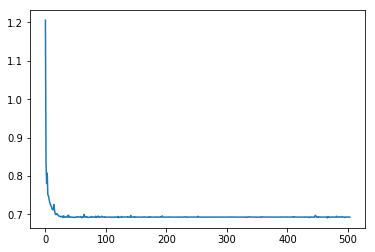

In [66]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(len(loss))], loss)

In [46]:
model.predict(X.iloc[0].reshape(1,-1))

C:\Users\eugli\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[-0.8605554, -0.8564411]], dtype=float32)

In [ ]:
X